In [129]:
import ROOT
import ctypes

In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [130]:


# sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_phi/standard.root")
sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_phi/standard.root")
signal_1ab_tree = sig_1ab_file.Get("phi")

D0bar_sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_phi_cc/standard.root")

# D0bar_sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_phi_cc/standard.root")
D0bar_signal_1ab_tree = D0bar_sig_1ab_file.Get("phi_cc")

In [131]:
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.67,2.06)
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.72,1.92)
# D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.67, 2.06)
D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.68, 1.95)
# D0_M_TH1F_3 = ROOT.TH1F("D0_M_TH1F_3","D0 mass",50,1.68, 1.9)


In [132]:
# def extract_histo(tree, histogram):
#     for event in tree:
#         histogram.Fill(event.D0_M)
#     return histogram

In [133]:
# def apply_cuts(tree, histogram):
#     for event in tree:
#         # if event.D0_M > 1.67 and event.D0_M < 2.06:
#         if event.D0_M > 1.78 and event.D0_M < 1.92:

#             histogram.Fill(event.D0_M)
#     return histogram

In [134]:
def extract_signals(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        # if event.iCascDcyBrP_Dst_0 ==0 and event.D0_M > 1.67 and event.D0_M < 2.06:
        if (event.iCascDcyBrP_Dst_0 ==6 or event.iCascDcyBrP_Dst_0 ==0) and event.D0_M > 1.68 and event.D0_M < 1.95 and event.Belle2Pi0Veto_75MeV > 0.022:
        # if ( event.iCascDcyBrP_Dst_0 ==0) and event.D0_M > 1.67 and event.D0_M < 1.9 and event.Belle2Pi0Veto_75MeV > 0.022:

            histogram.Fill(event.D0_M)
    return histogram

In [135]:
def extract_signals_D0bar(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        # if event.iCascDcyBrP_Dst_0 ==0 and event.D0_M > 1.67 and event.D0_M < 2.06:
        if (event.iCascDcyBrP_Dstm_0 ==6 or event.iCascDcyBrP_Dstm_0 ==0) and event.D0_M > 1.68 and event.D0_M < 1.95 and event.Belle2Pi0Veto_75MeV > 0.022:
        # if ( event.iCascDcyBrP_Dst_0 ==0) and event.D0_M > 1.67 and event.D0_M < 1.9 and event.Belle2Pi0Veto_75MeV > 0.022:

            histogram.Fill(event.D0_M)
    return histogram

In [136]:

# D0_M_TH1F = apply_cuts(signal_tree, D0_M_TH1F)
# c1 = ROOT.TCanvas()
# D0_M_TH1F.Draw()
# c1.Draw()

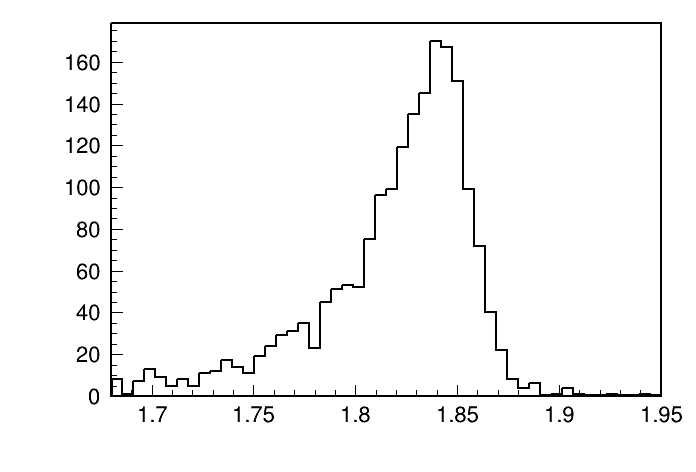

In [137]:

D0_M_TH1F_2 = extract_signals(signal_1ab_tree, D0_M_TH1F_2)
# D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

c1 = ROOT.TCanvas()
D0_M_TH1F_2.Draw()
c1.Draw()

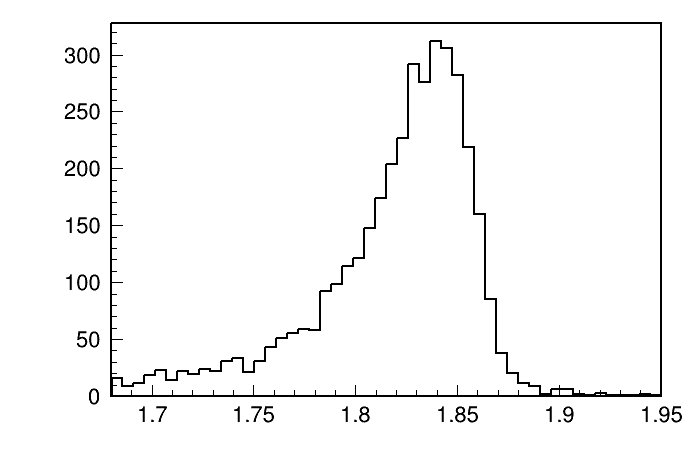

In [138]:

D0_M_TH1F_2 = extract_signals_D0bar(D0bar_signal_1ab_tree, D0_M_TH1F_2)
# D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

c1 = ROOT.TCanvas()
D0_M_TH1F_2.Draw()
c1.Draw()

In [139]:

# scale_factor = D0_M_TH1F_2.GetEntries()/D0_M_TH1F.GetEntries()

In [140]:
# scale_factor

In [141]:
fitting_region = (1.68, 1.95)
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# x.setBins(50)
l = ROOT.RooArgList(x)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F_2, 1)


In [142]:

mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.84,1.83, 1.86)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0,0.5)
alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,2)
n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 5,0,10)
 
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    




[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.68,1.95]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.68,1.95]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_model_sighist' created with bounds [1.68,1.95]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization --  The fol

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file phi_massveto_1ab_Vpi0.png has been created


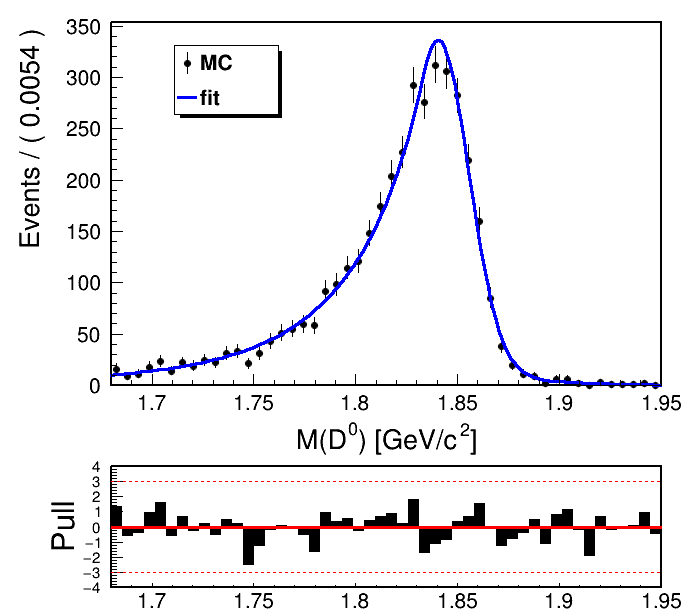

In [143]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)



# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)


r = model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

# D0_M_TH1F_2.SetFillColor(4)
# D0_M_TH1F_2.SetStats(0)
# stack = ROOT.THStack()
# stack.Add(D0_M_TH1F_2)
# # stack.Add(mgg)
# stack.Draw("HIST")
# D0_M_TH1F_2.Draw("same")


signalhist.plotOn(frame,Name = "data1", XErrorSize=0)

# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.25, 0.75, 0.4, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
#canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/phigamma/phi_massveto_1ab_Vpi0.png")
canv.SaveAs("phi_massveto_1ab_Vpi0.png")

f = ROOT.TFile("phig_MC15ri_1ab_Vpi0_fitresult.root", "RECREATE")
r.Write("phig")
f.Close()


In [144]:
model.Print("t")

0x5578fc466da0 RooAddPdf::model = 0.534871 [Auto,Dirty] 
  0x5578fc465b10/V- RooGaussian::sig1 = 0.85605 [Auto,Dirty] 
    0x5578f5fb3420/V- RooRealVar::M(D^{0}) = 1.815
    0x557902ea6e70/V- RooRealVar::mean = 1.84047 +/- 0.000652828
    0x5578f70589b0/V- RooRealVar::sigma1 = 0.0456821 +/- 0.00836828
  0x5578f58a5300/V- RooRealVar::sig1frac = 0.0464913 +/- 0.0150833
  0x5578f63a1410/V- RooCBShape::sig2 = 0.519211 [Auto,Dirty] 
    0x5578f5fb3420/V- RooRealVar::M(D^{0}) = 1.815
    0x557902ea6e70/V- RooRealVar::mean = 1.84047 +/- 0.000652828
    0x5578f6ea4e80/V- RooRealVar::sigma2 = 0.0151991 +/- 0.000556054
    0x5578f5f341e0/V- RooRealVar::alpha = 0.477783 +/- 0.0364974
    0x5578f70474c0/V- RooRealVar::n_CB = 4.89608 +/- 1.20731


In [57]:
model.Print("t")

0x5578f0bbbc90 RooCBShape::model = 0.327286 [Auto,Dirty] 
  0x5578f6ea4e80/V- RooRealVar::M(D^{0}) = 1.795
  0x5578f70474c0/V- RooRealVar::mean = 1.83804 +/- 0.000868069
  0x5578f8238720/V- RooRealVar::sigma2 = 0.0182731 +/- 0.0005686
  0x5578f7eb8540/V- RooRealVar::alpha = 0.595959 +/- 0.0564456
  0x5578f70589b0/V- RooRealVar::n_CB = 4.34234 +/- 1.15552


In [60]:
f = ROOT.TFile.Open("phig_MC15ri_1ab_Vpi0_fitresult.root")
r2 = ROOT.gDirectory.Get("phig")
f.Close()


In [61]:
r2.Print()


  RooFitResult: minimized FCN value: -3775.25, estimated distance to minimum: 7.5273e-06
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                 alpha    5.6565e-01 +/-  5.40e-02
                  mean    1.8407e+00 +/-  7.80e-04
                  n_CB    3.7229e+00 +/-  9.81e-01
                sigma2    1.5883e-02 +/-  5.59e-04



In [79]:
r2.correlation("alpha","n_CB")

-0.8506516472603695

In [80]:
r2.edm()

4.7891186550735315e-05

In [51]:
r2.correlationMatrix()

<cppyy.gbl.TMatrixTSym<double> object at 0x562e3e623a10>

In [80]:
# sig_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_phi/standard.root")
# signal_tree = sig_file.Get("phi")


# # sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_phi/standard.root")
# # signal_1ab_tree = sig_1ab_file.Get("phi")


In [90]:
sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_phi/standard.root")
signal_tree = sig_1ab_file.Get("phi")

D0bar_sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_phi_cc/standard.root")
D0bar_signal_tree = D0bar_sig_1ab_file.Get("phi_cc")

In [91]:
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.67,2.06)
TH1F = ROOT.TH1F("D0_cosHel_0_TH1F","D0 mass",50,-1,1)
# D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.72,1.92)


In [92]:
def apply_cuts(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        if (event.iCascDcyBrP_Dst_0 ==6 or event.iCascDcyBrP_Dst_0 ==0) and event.D0_M > 1.68 and event.D0_M < 1.90 and event.Belle2Pi0Veto_75MeV > 0.022:

            histogram.Fill(event.D0_cosHel_0)
    return histogram

In [93]:
def apply_cuts_D0bar(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        if (event.iCascDcyBrP_Dstm_0 ==6 or event.iCascDcyBrP_Dstm_0 ==0) and event.D0_M > 1.68 and event.D0_M < 1.90 and event.Belle2Pi0Veto_75MeV > 0.022:

            histogram.Fill(event.D0_cosHel_0)
    return histogram

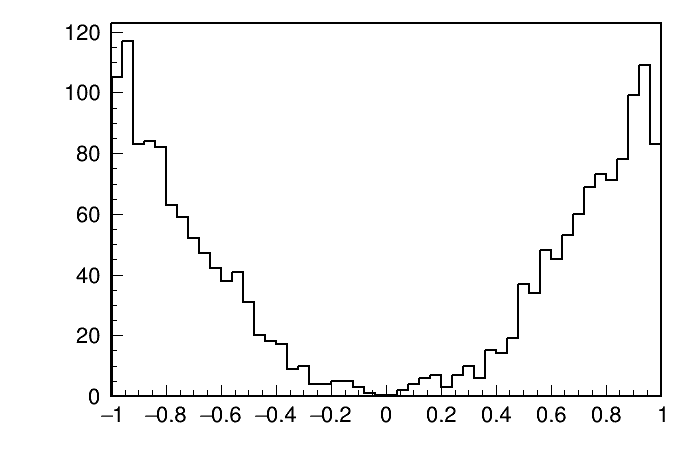

In [94]:

TH1F = apply_cuts(signal_tree, TH1F)
c1 = ROOT.TCanvas()
TH1F.Draw()
c1.Draw()

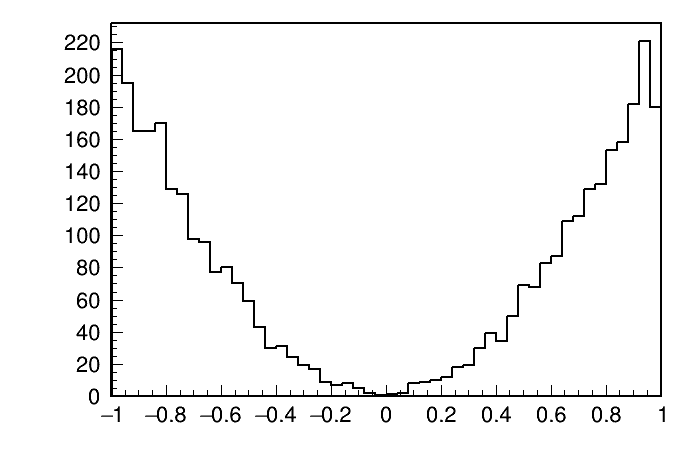

In [95]:
TH1F = apply_cuts_D0bar(D0bar_signal_tree, TH1F)
# D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

c1 = ROOT.TCanvas()
TH1F.Draw()
c1.Draw()

In [96]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared", "x,c0", "", "c0*x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared.cxx+")

93978227492992

(MyPdf_xsquared) An instance of MyPdf_xsquared.


In [97]:
fitting_region = (-1,1)
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# x.setBins(50)
l = ROOT.RooArgList(x)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, 1)

signalhist = ROOT.RooDataHist("sighist", "sighist", l, TH1F, 1)


In [98]:
c0 = ROOT.RooRealVar("c0", "c0",0.5, -1,1)
model = ROOT.MyPdf_xsquared("model", "pdf", x, c0)


[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) constructing test statistic for sub-range named fit
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[M(D^{0})]) using numeric integrator RooIntegrator1D to calculate Int(M(D^{0}))
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[M(D^{0})]) using numeric integrator RooIntegrator1D to calculate Int(M(D^{0}))
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[M(D^{0})]) using numeric integra

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file phi_massveto_1ab_Vpi0_helicity.png has been created


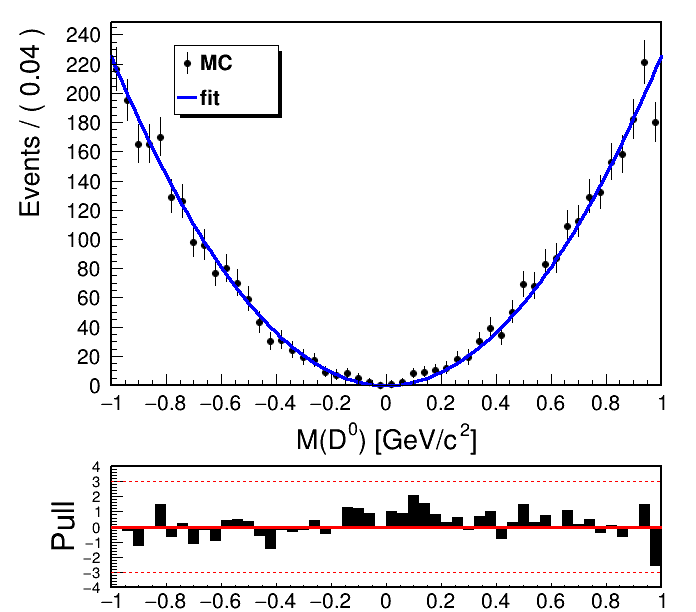

In [106]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# sig1 = ROOT.RooJohnson("sig1", "Signal component 1", x,mu, para_lambda,gamma,delta)

sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)



# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

# model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)


r = model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 





# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

signalhist.plotOn(frame,Name = "data1", XErrorSize=0)
# 
# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# # sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)



# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")



leg1 = ROOT.TLegend(0.25, 0.75, 0.40, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
#canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/phigamma/phi_massveto_1ab_signal.png")
canv.SaveAs("phi_massveto_1ab_Vpi0_helicity.png")

# f = ROOT.TFile("phig_MC15ri_half1M_signalMC_fitresult.root", "RECREATE")
# r.Write("phig")
# f.Close()
